#**CLASSIFICATION : TRUE/FALSE :**

**Membres:** Hadjoudja Bachir (21811363), Zeggar Rym (21909615), Bendahmane Rania (21811387), Labiad Youcef (21710780).

In [ ]:
#les imports utilisés dans ce notebook 
import sys
from numpy import vstack
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from pandas import read_csv
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.pipeline import Pipeline

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
# fonction qui affiche le classification report et la matrice de confusion
from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


chemin spécifique Google Drive

In [ ]:
my_local_drive='/content/gdrive/My Drive/'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%ls

%pwd

[Errno 2] No such file or directory: '/content/gdrive/My Drive/'
/content
drive/  sample_data/


'/content'

 La fonction qui sera utilisée pour les prétraitements: MyCleanText 
* Mettre le texte en minuscule
* Se débarasser des stopwords
* Se débarasser des nombres
* Stemmatisation
* Lemmatisation ..

La fonction MyshowAllScores prend le y_test et le y_predict, affiche l'accuracy et le classification report avec la matrice de confusion.

In [ ]:
#...................................................Fonction MyCleanText .............................................................................
# mettre en minuscule
#enlever les stopwords
#se debarasser des nombres
#stemmatisation
#lemmatisation 
#......................................................................................................................................................


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#liste des stopwords en anglais
stop_words = set(stopwords.words('english')) 

def MyCleanText(X,
                lowercase=False, #mettre en minuscule
                removestopwords=False, #supprimer les stopwords
                removedigit=False, #supprimer les nombres
                getstemmer=False, #conserver la racine des termes
                getlemmatisation=False #lemmatisation des termes
                ):
  #conversion du texte d'entrée en chaîne de caractères
    sentence=str(X)
    #suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence   



def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(cnf_matrix,display_labels=classes)
  disp.plot()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* La classe TextNormalizer qui contiendra la fonction MyCleanText.

* Fit_transform de mon corpus propre.


In [ ]:
#..................................................Etape 1 : prétraitement du texte ...................................................................................................
#...................................................Class TextNormalizer  .............................................................................
#fit_transform de mon corpus propre 
#......................................................................................................................................................

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


##**Etape 1 : Préparer les données**
* Load et preparer les données à partir des 2 fichiers csv
* Sélectionner que les lignes où on a True, False 


In [ ]:
#Ici je cherche à séléctionner que les labels TRUE et FALSE, donc les LIGNES qui contiennent au rating TRUE et FALSE uniquement, le reste on enlève

dftrain = pd.read_csv("/content/drive/MyDrive/newsTrain2.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain.reset_index(drop = True, inplace = True)

dftrain2 = pd.read_csv("/content/drive/MyDrive/newsTrain_-_newsTrain.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain2.reset_index(drop = True, inplace = True)


# concaténer les deux dataframes en ajoutant les lignes du deuxième à la fin du premier
dftrain = pd.concat([dftrain, dftrain2], ignore_index=True)


dftrain = dftrain.loc[dftrain['rating'].isin(['TRUE','FALSE'])]
#dftest=pd.read_csv("/content/gdrive/MyDrive/newsTest.csv",names=['id','text','title','rating','veracity'], header=0,sep=',', encoding='utf8')
print("Echantillon de mon dataset \n")
print(dftrain.sample(n=10))
print("\n")
print("Quelques informations importantes \n")
dftrain.info()
#print(dftest.head())
X_text=dftrain.iloc[0:,1:2]

print("le type de X_test est" ,X_text.columns)
X_title=dftrain.iloc[0:,2:3]
print("le texte est")
display(X_text)
print("le titre est")
display(X_title)
#X_test=dftest.iloc[1:, :4]
y=dftrain.iloc[0:,-1]
print("voici la dernière case")
display(y)
#y_test=dftest.iloc[1:, -1]
#y = y_train.ravel()
print("la taille de X_text est",X_text.shape)
print("la taille de y_train est " ,y.shape)
print("les valeurs de TRUE et FALSE sont " ,y.value_counts())


Echantillon de mon dataset 

            id                                               text  \
212   4ce1af1d  Martin Gugino is a 75-year-old professional ag...   
2250  d1741354  News| [email protected] “If you won’t lead, th...   
330   a94e340d  Joseph R. Biden declared last year on the camp...   
1289  7c9af097  In Brief The Facts: It is alleged by many in t...   
345   0a12bd0d  The NFL has decided to roll back its rule agai...   
1043  cef0a3d1  Occupation: President and CEO, Bettencourt Tax...   
43    aacdc4d3  Today, Congresswoman Maxine Waters D-CA, Chair...   
2315  c9a08752  Tom Clark: Osborne swung his axe without mercy...   
71    d0b11b17  163 paid protesters have filed a lawsuit again...   
986   d1741354  News| [email protected] “If you won’t lead, th...   

                                                  title rating  
212   Buffalo Officials Duped By Professional Antifa...  FALSE  
2250  IT'S OFFICIAL: Brexit Britain WILL thrive out ...  FALSE  
330   Biden's cl

,text
0,Distracted driving causes more deaths in Canad...
3,But things took a turn for the worse when riot...
4,It’s no secret that Epstein and Schiff share a...
6,"November 23, 2019 The U.S. Food and Drug Admi..."
7,"Trump confirms this was a bombing, not an acci..."
...,...
2523,More than four million calls to the taxman are...
2524,More under-18s are being taken to court for se...
2525,The Government’s much vaunted Help to Buy Isa ...
2526,The late Robin Williams once called cocaine “G...


le titre est


,title
0,"You Can Be Fined $1,500 If Your Passenger Is U..."
3,Obama’s Daughters Caught on Camera Burning US ...
4,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
6,FDA Shocking Study: Cells Used In Vaccines Con...
7,"Israel Hits Beirut with Nuclear Missile, Trump..."
...,...
2523,Taxman fails to answer four million calls a ye...
2524,Police catch 11‑year‑olds being used to sell d...
2525,"Help to Buy Isa scandal: 500,000 first-time bu..."
2526,A coke-snorting generation of hypocrites


voici la dernière case


0       FALSE
3       FALSE
4       FALSE
6       FALSE
7       FALSE
        ...  
2523     TRUE
2524     TRUE
2525    FALSE
2526     TRUE
2527     TRUE
Name: rating, Length: 1578, dtype: object

la taille de X_text est (1578, 1)
la taille de y_train est  (1578,)
les valeurs de TRUE et FALSE sont  FALSE    1156
TRUE      422
Name: rating, dtype: int64


Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. On fait en sorte que le nombre de lignes avec en sortie FAUX soit égal au nombre de lignes avec en sortie true.

In [ ]:
#On applique du sous-échantillonnage (downsampling) : car on a plus de FALSE (578) que des TRUE (211) 


# Séparer les classes en deux dataframes
df_false = dftrain[dftrain['rating'] == 'FALSE']
df_true = dftrain [dftrain['rating'] == 'TRUE']


# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_false_subsampled = df_false.sample(n=len(df_true), random_state=42)

# Concaténer les deux dataframes
dftrain = pd.concat([df_false_subsampled, df_true])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)


X_text=dftrain["text"]
X_title=dftrain["title"]
y=dftrain.iloc[0:,-1]
print("la taille de X_text est",X_text.shape)
print("\n")
print("la taille de X_title est",X_title.shape)
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())

la taille de X_text est (844,)


la taille de X_title est (844,)


la taille de y_train est  (844,)


les valeurs de TRUE et FALSE maintenant sont  TRUE     422
FALSE    422
Name: rating, dtype: int64


 Découpage du jeu de données en jeu de test et d'entrainement

In [ ]:
X=dftrain.iloc[0:, 1:3]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train.shape)
print("y_train is",y_train.shape)
print("X_test is",X_test.shape)
print("y_test is",y_test.shape)

                                                   text  \
615   It’s been a long time coming, but finally we h...   
1303  Constitutional Attorney Matthew DePerno is an ...   
1232  The United States is witnessing a massive, dan...   
2022  After three decades on the bench, Sarah Parker...   
287   Based on actual results and accounting for sta...   
...                                                 ...   
1006  5 Million Muslim Children In Yemen Died due to...   
1543  The bombshell claim comes from over 20 hours o...   
853   BILL GATES EXPLAINS THAT THE COVID VACCINE WIL...   
296   Let our journalists help you make sense of the...   
1325  Though the whole world relies on RT-PCR to “di...   

                                                  title  
615   JK Rowling Confirms Stance Against Transgender...  
1303  MI Sec of State Official Caught On Video Telli...  
1232  What science can tell us about the links betwe...  
2022        Sarah Parker leaves legacy on Supreme Court  
2

##**Etape 2 : Classification selon la colonne TEXT :**


Tester avec plusieurs classifieurs classiques.


**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 3 meilleurs sont SVM,LR et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:

score = 'accuracy'
seed = 7
allresults = []
results = []
names = []


X_train_text=X_train['text']
X_train_text.reset_index(drop = True, inplace = True)


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

                        
# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train_text,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_text,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)
    names.append(p[0])

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC())])
all resultats [('SVM', 0.9038410886742756, 0.043294516291260216), ('RF', 0.8948200175592624, 0.0370882010820444), ('LogisticRegression', 0.8356233538191397, 0.0345425007546011), ('CART', 0.832550482879719, 0.

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

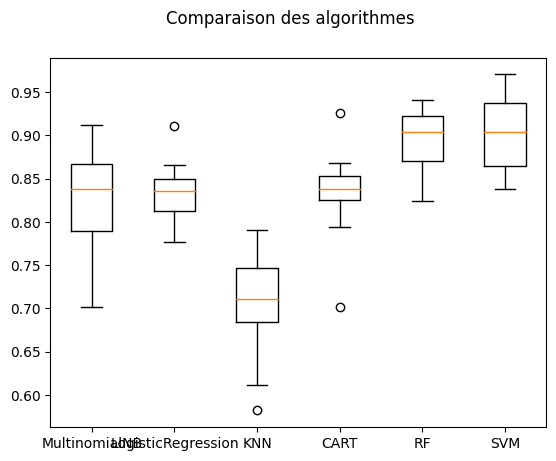

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres et hyperparamètres pour SVM et RF : 



On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (675,)
y_test (169,)
X_test (169, 2)
grid search fait
X_train (675, 24296)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.849 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.870
Classification Report
              precision    recall  f1-score   support

       FALSE    0.89610   0.83133   0.86250        83
        TRUE    0.84783   0.90698   0.87640        86

    accuracy                        0.86982       169
   macro avg    0.87196   0.86915   0.86945       169
weighted avg    0.87154   0.86982   0.86958       169

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 'scale'
	kernel: 'linear'
grid search fait
X_train (675, 20741)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.846 

meilleur estimateur SVC(gamma=0.01, random_state=42) 

Accuracy : 0.905
Classification Report
              precision    recall  f1-score   support

       FALSE    0.83838   1.

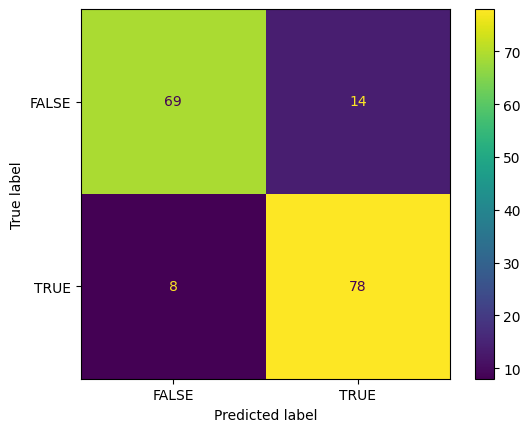

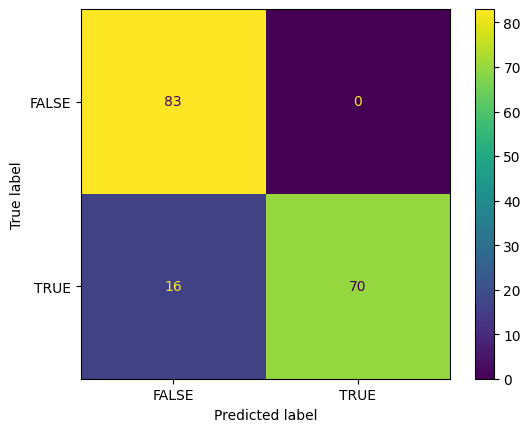

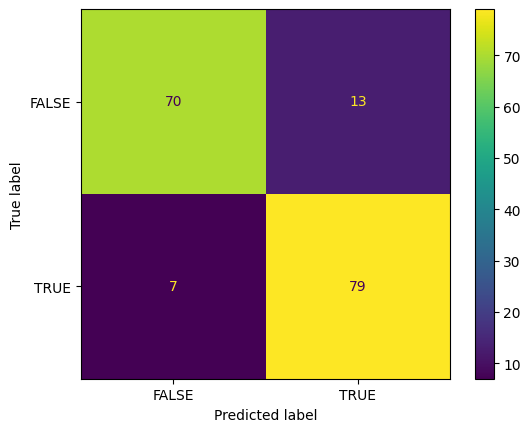

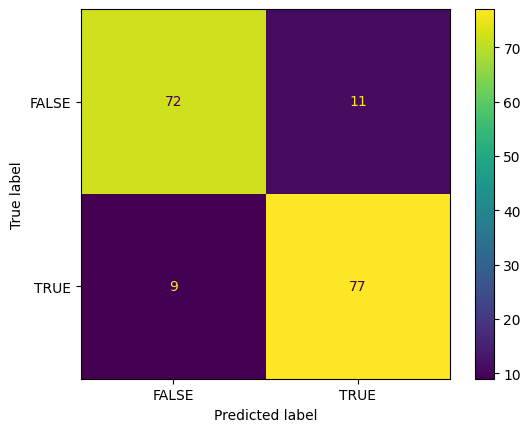

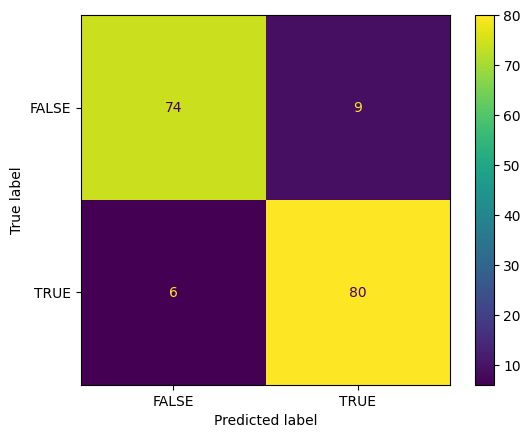

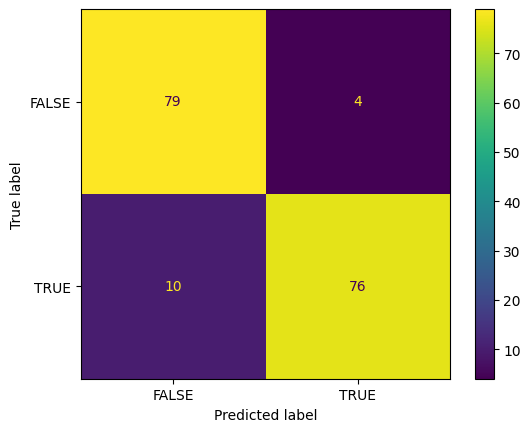

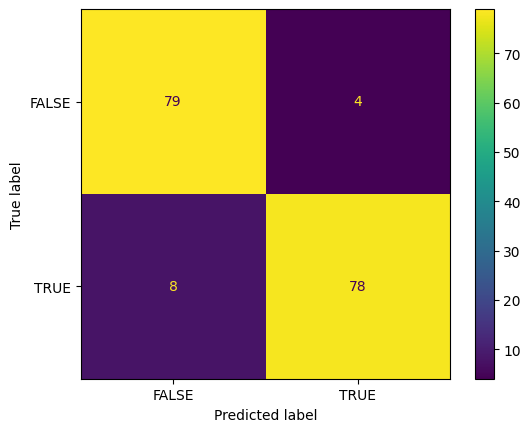

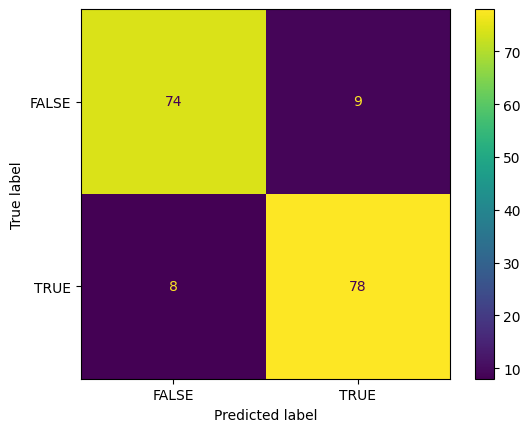

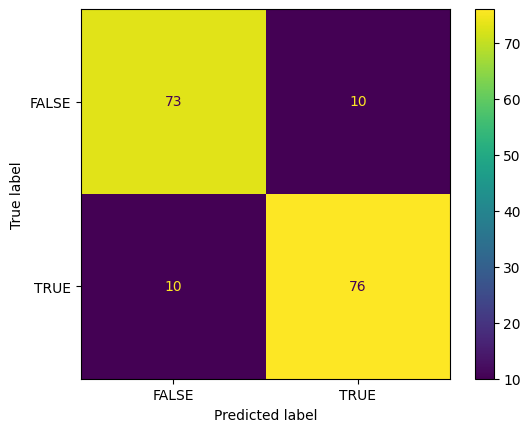

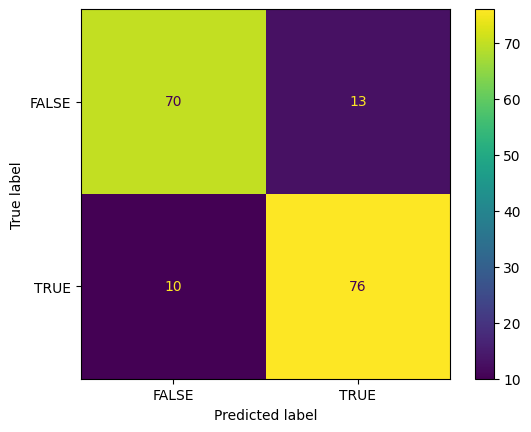

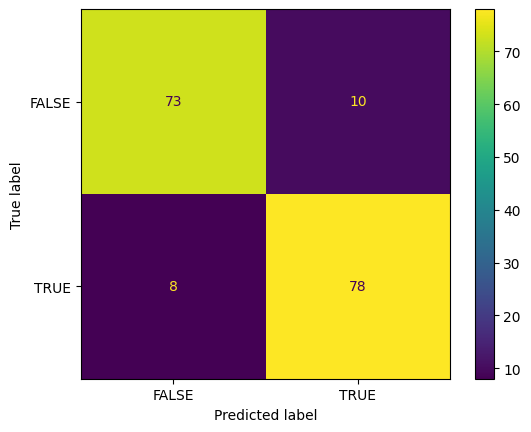

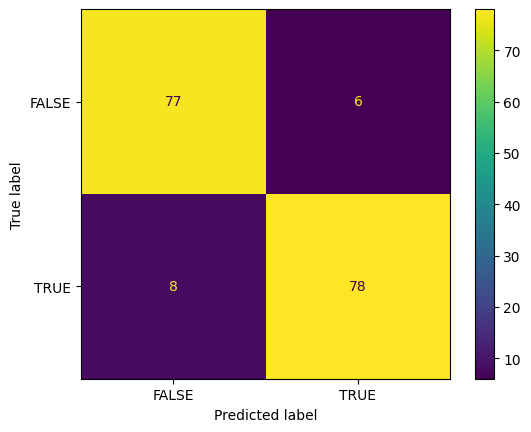

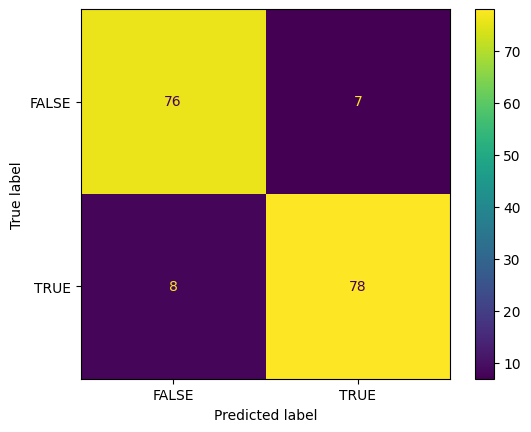

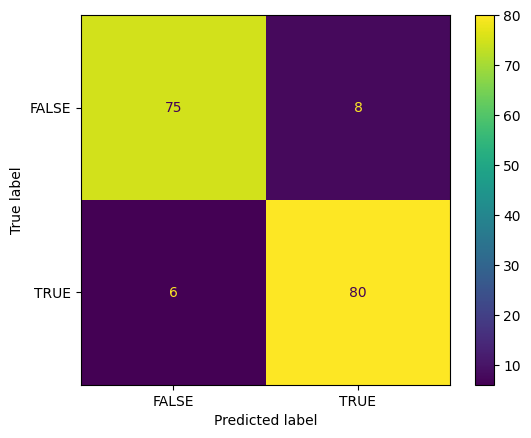

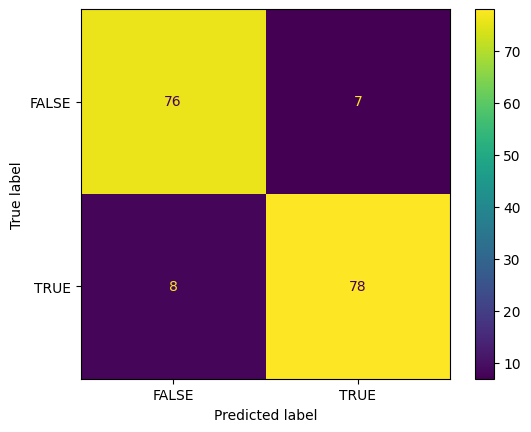

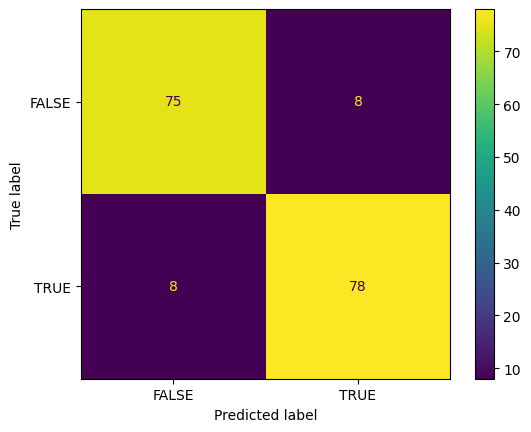

In [ ]:
from sklearn.model_selection import GridSearchCV


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import numpy as np
np.random.seed(42)  # Set the random seed for NumPy
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print("X_test", X_test.shape)

X_train_text=X_train['text']
X_train_title=X_train['title']

# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_SVC = []
X_test_text_SVC = []

X_train_text_RandomForestClassifier = []
X_test_text_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_text_SVC.append(pipeline.fit_transform(X_train['text']).toarray())
    X_test_text_SVC.append(pipeline.transform(X_test['text']).toarray())
    X_train_text_RandomForestClassifier.append(pipeline.fit_transform(X_train['text']).toarray())
    X_test_text_RandomForestClassifier.append(pipeline.transform(X_test['text']).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text = eval('X_train_text_' + model_name)
    X_test_text = eval('X_test_text_' + model_name)
    for i in range (len(X_train_text)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_text[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_text[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 3 : Classification selon la colonne TITRE :**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import time
import numpy as np

# Utilisez la méthode ravel() pour transformer y_train en un tableau unidimensionnel
#X_train = np.ravel(X_train)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train,y_train)
all_results=[]
scores=[]
names = []
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train['title'],y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))

X_train (675, 2)
y_train (675,)
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.810359964881475, 0.05872410123263959), ('LogisticRegression', 0.8104697102721685, 0.070189586272

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

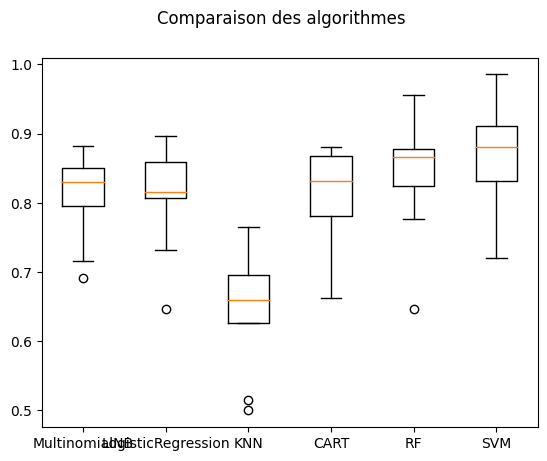

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres pour SVM et RF : 


On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (675,)
y_test (169,)
X_test (169, 2)
grid search fait
X_train (675, 5734)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.831 

meilleur estimateur SVC(gamma=0.3, random_state=42) 

Accuracy : 0.882
Classification Report
              precision    recall  f1-score   support

       FALSE    0.89873   0.85542   0.87654        83
        TRUE    0.86667   0.90698   0.88636        86

    accuracy                        0.88166       169
   macro avg    0.88270   0.88120   0.88145       169
weighted avg    0.88242   0.88166   0.88154       169

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 0.3
	kernel: 'rbf'
grid search fait
X_train (675, 4861)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.840 

meilleur estimateur SVC(gamma=0.3, random_state=42) 

Accuracy : 0.917
Classification Report
              precision    recall  f1-score   support

       FALSE    0.92593   0.90361   0.91463 

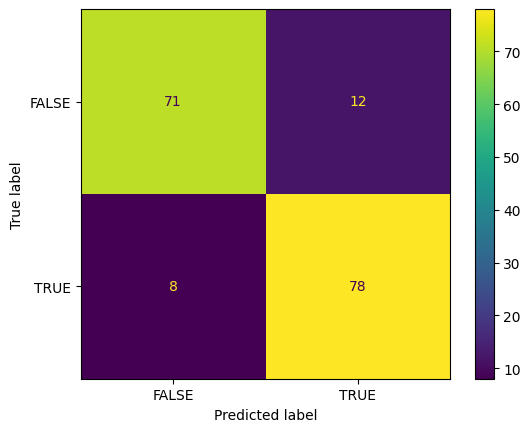

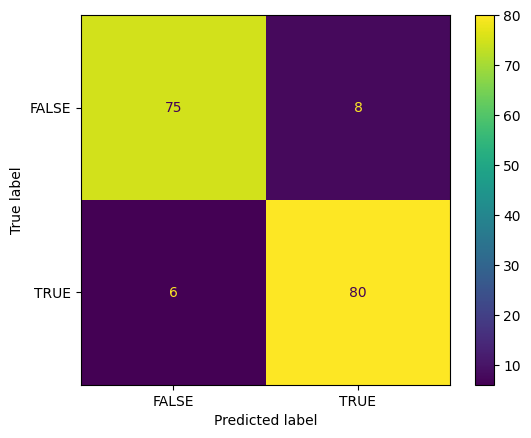

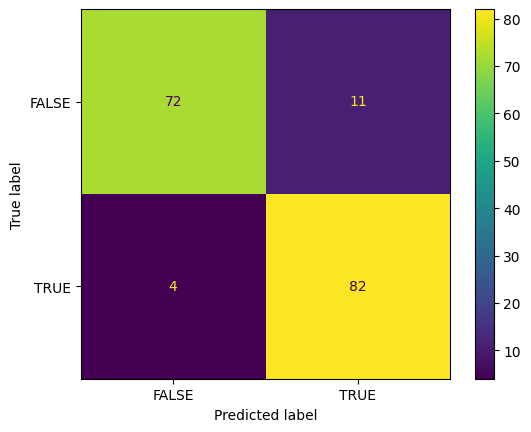

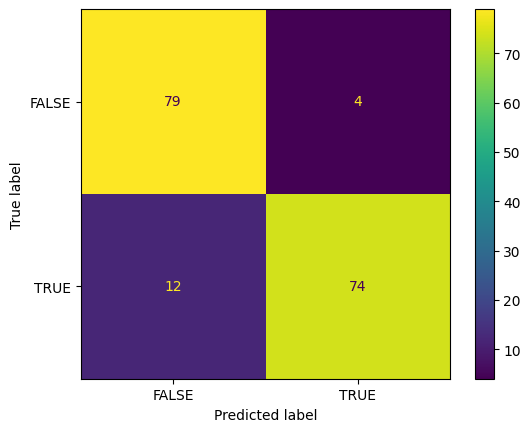

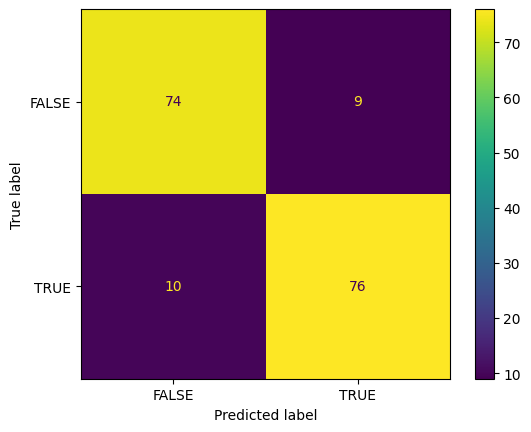

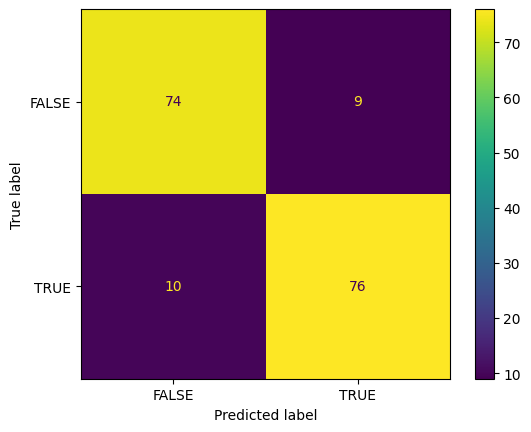

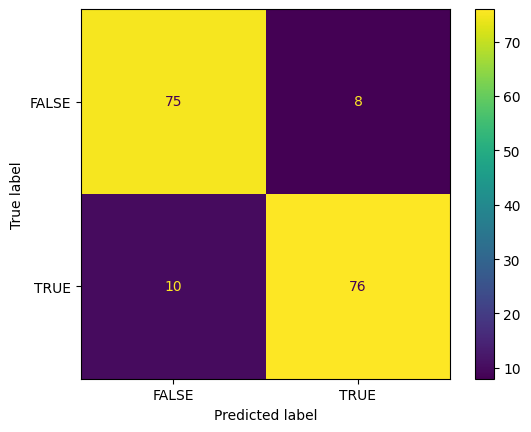

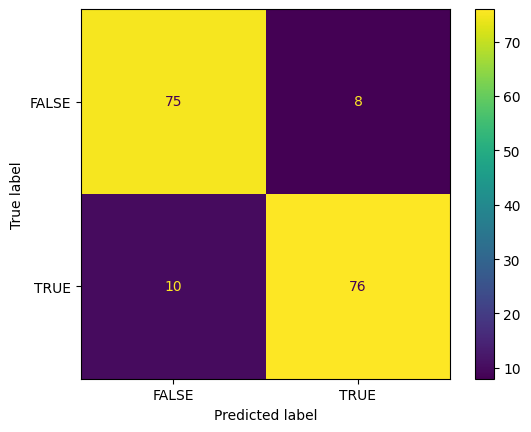

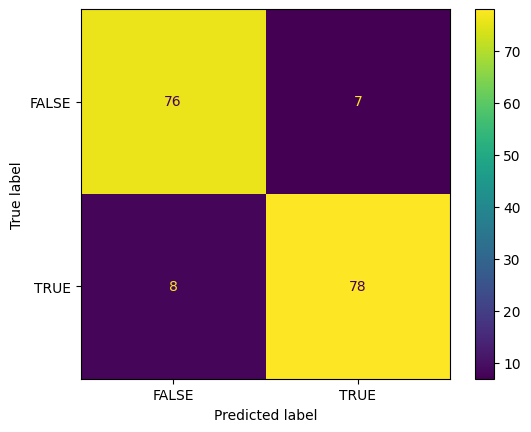

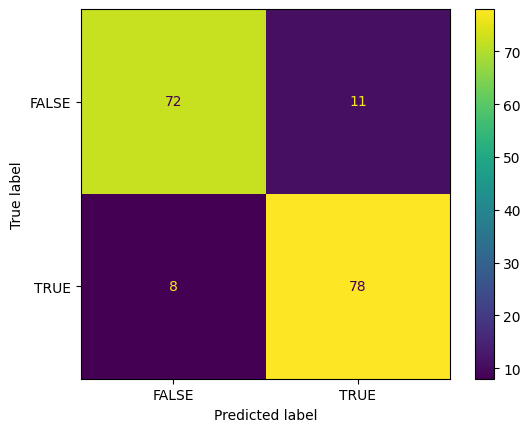

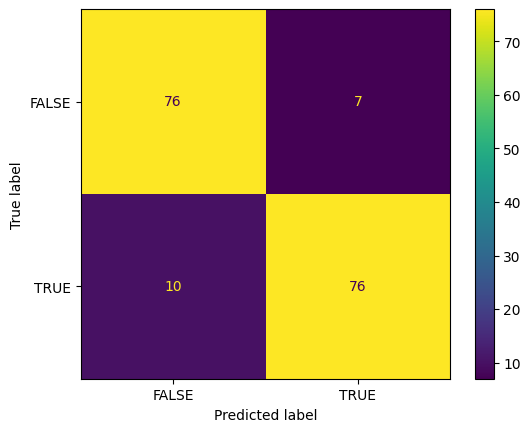

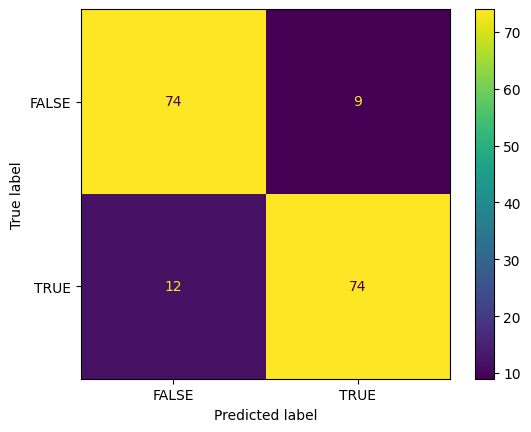

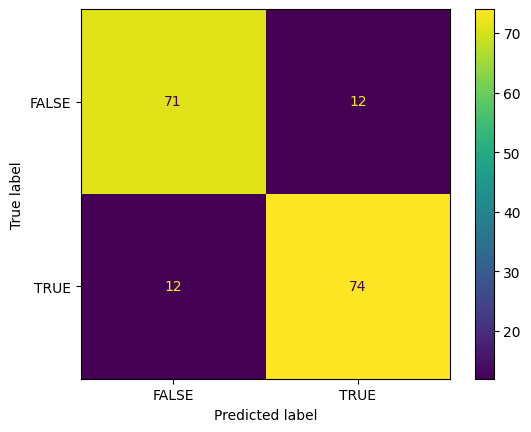

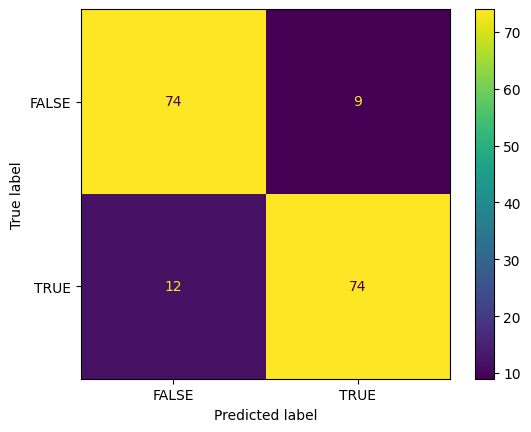

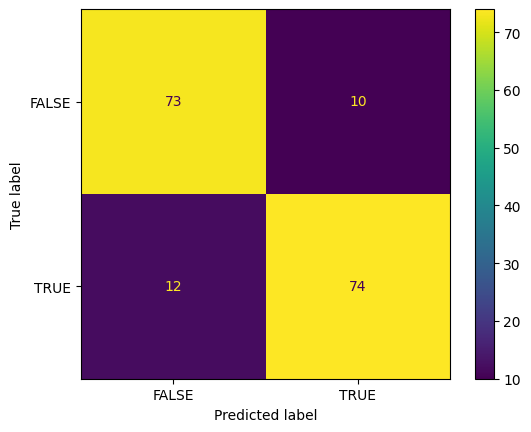

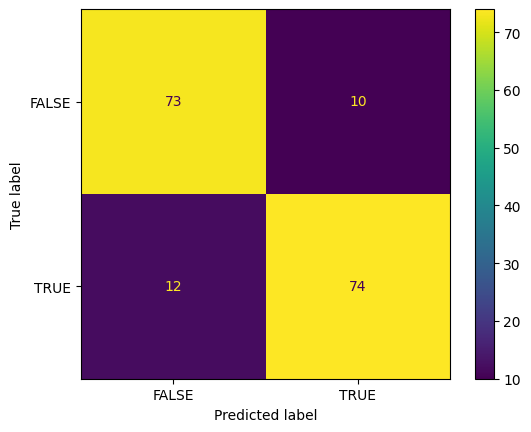

In [ ]:
from sklearn.model_selection import GridSearchCV


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import numpy as np
np.random.seed(42)  # Set the random seed for NumPy
print("y_train", y_train.shape)
print("y_test", y_test.shape)
#X_test = np.ravel(X_test)
print("X_test", X_test.shape)
# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []

X_train_title_RandomForestClassifier = []
X_test_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train['title']).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test['title']).toarray())
    X_train_title_RandomForestClassifier.append(pipeline.fit_transform(X_train['title']).toarray())
    X_test_title_RandomForestClassifier.append(pipeline.transform(X_test['title']).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 4 : Classification selon le TITRE ET TEXT ENSEMBLE (Concaténés):**

* On va à partir de X_train concaténer les 2 colonnes TEXT et TITLE en mettant un espace entre les deux 
* Vu qu'on va travailler sur la colonne text_titre qu'on vient de créer, on va séléctionner cette dernière depuis le X_train et X_test pour apprendre et tester après.

In [ ]:

#concaténation
X_train=X_train.apply(lambda row: ' '.join([str(val) for val in row]), axis=1)
X_test=X_test.apply(lambda row: ' '.join([str(val) for val in row]), axis=1)


**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import time
import numpy as np

# Utilisez la méthode ravel() pour transformer y_train en un tableau unidimensionnel
y_train = np.ravel(y_train)

np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


#models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.8041703248463564, 0.07914308005639414), ('LogisticRegression', 0.8267778753292362, 0.028218150067996238), ('KNN', 0.681431079894

### Choisir les meilleurs paramètres pour SVM et RF : 


On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.847 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.870
Classification Report
              precision    recall  f1-score   support

       FALSE    0.94203   0.78313   0.85526        83
        TRUE    0.82000   0.95349   0.88172        86

    accuracy                        0.86982       169
   macro avg    0.88101   0.86831   0.86849       169
weighted avg    0.87993   0.86982   0.86873       169

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 'scale'
	kernel: 'linear'
grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.846 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.846
Classification Report
              precision    recall  f1-score   support

       FALSE    0.91304   0.75904   0.82895        83
        TRUE    0.80000   0.93023   0.86022        86

    accuracy                   

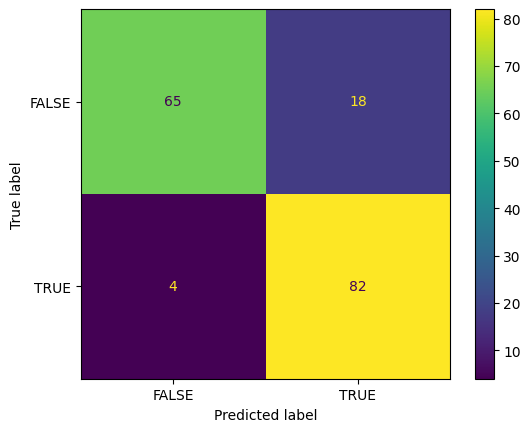

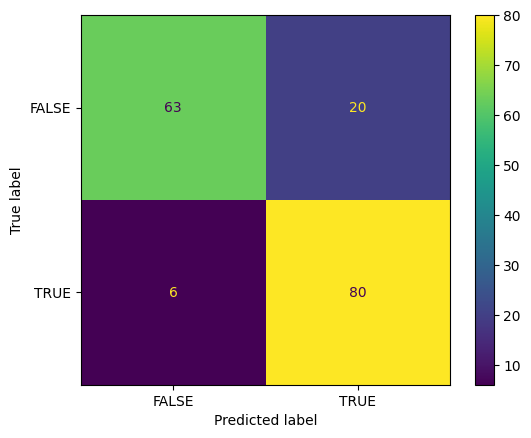

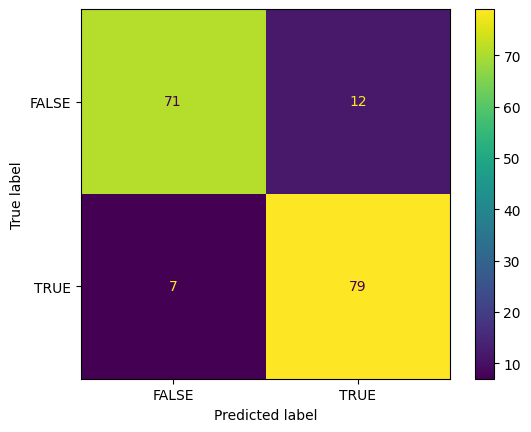

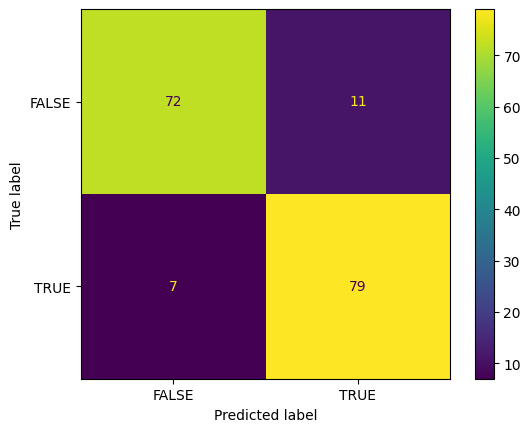

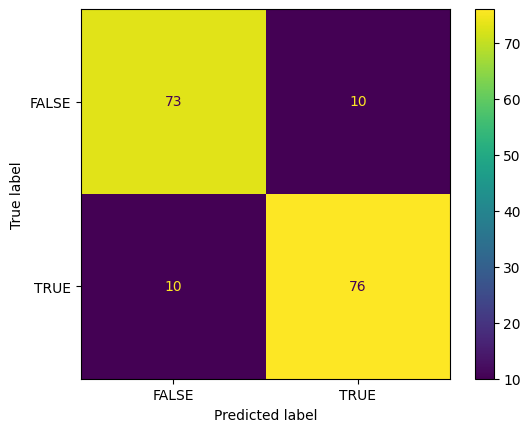

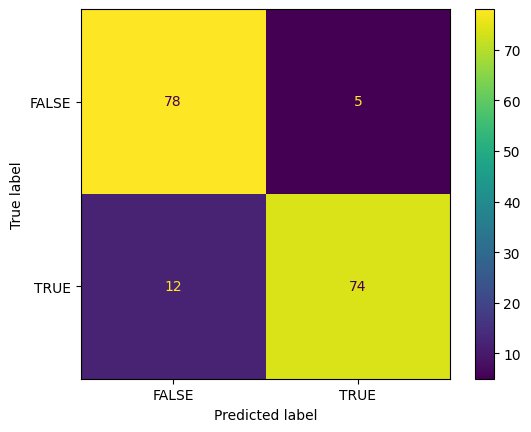

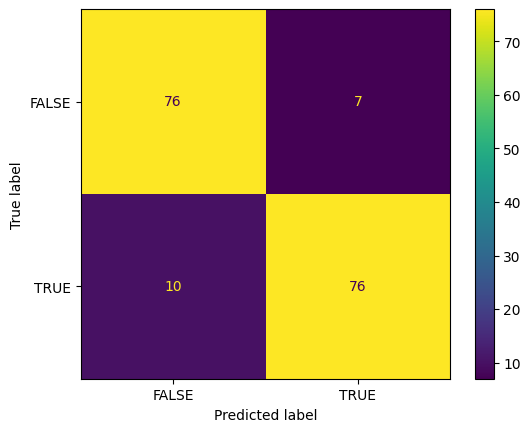

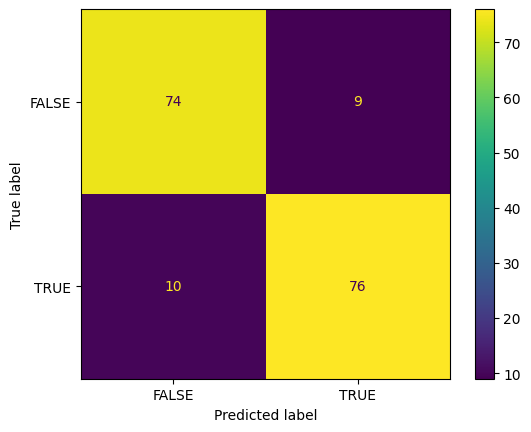

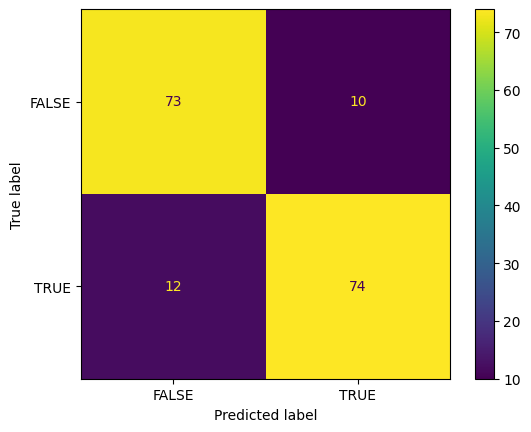

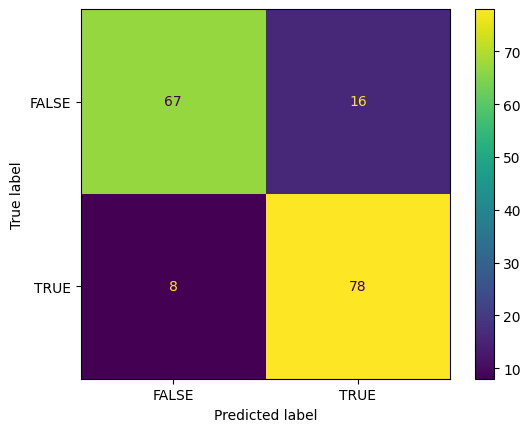

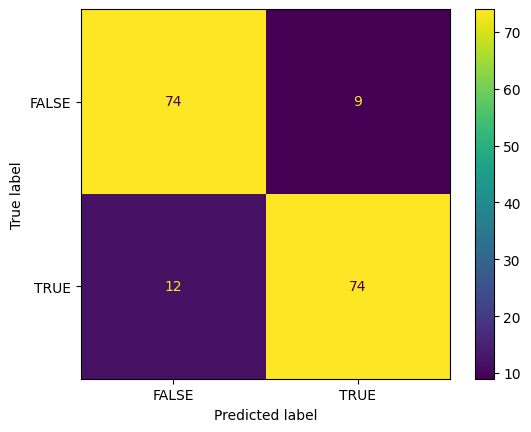

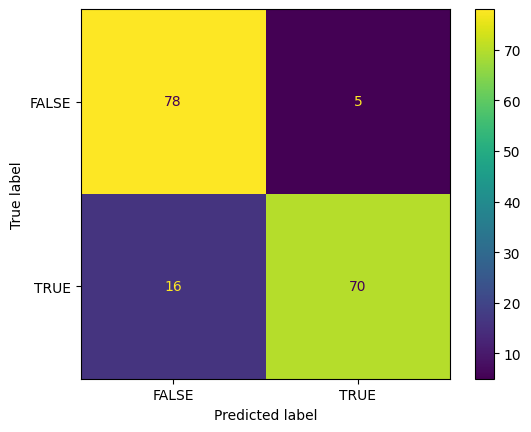

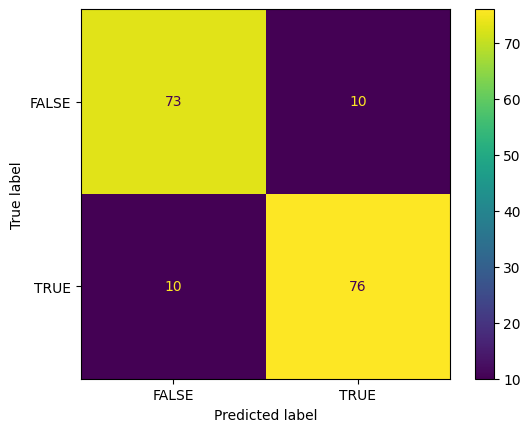

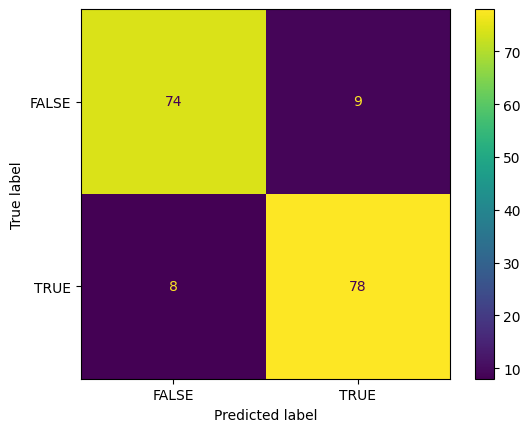

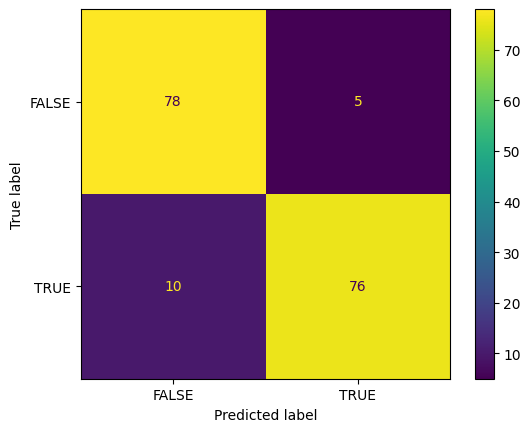

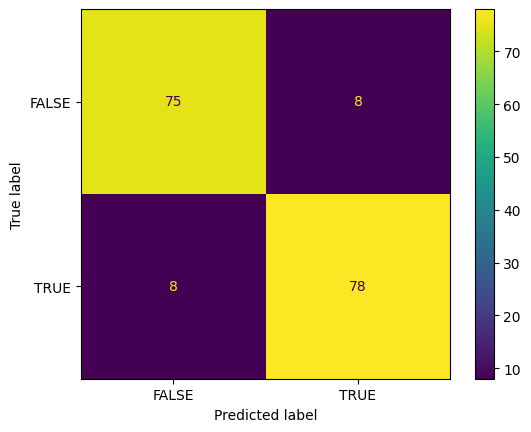

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate


# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_title_SVC = []
X_test_text_title_SVC = []

X_train_text_title_RandomForestClassifier = []
X_test_text_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_text_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_text_title_SVC.append(pipeline.transform(X_test).toarray())
    X_train_text_title_RandomForestClassifier.append(pipeline.fit_transform(X_train).toarray())
    X_test_text_title_RandomForestClassifier.append(pipeline.transform(X_test).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}],
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text_title = eval('X_train_text_' + model_name)
    X_test_text_title = eval('X_test_text_' + model_name)
    for i in range (len(X_train_text_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      grid_search.fit(X_train_text_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text_tile[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

On réapprends sur le X